In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = f'{model_name_list[1].lower()}' # ArrayList: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



['61', '95', '59', '92', '66', '50', '68', '57', '32', '35', '69', '56', '51', '58', '67', '93', '94', '60', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '89', '45', '73', '87', '80', '74', '6', '28', '17', '1', '10', '19', '26', '8', '21', '75', '81', '86', '72', '44', '43', '88', '38', '36', '31', '91', '65', '62', '96', '100', '54', '98', '53', '30', '37', '39', '99', '52', '55', '97', '63', '64', '90', '46', '79', '41', '83', '77', '48', '70', '84', '24', '23', '4', '15', '3', '12', '85', '71', '76', '82', '49', '40', '47', '78', '2', '13', '5', '14', '22', '25']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model linked: 44 of 101 = 43.56435643564357%
mutation score for rand_loop in model linked: 44 of 101 = 43.56435643564357%
mutation score for bes_no_loop in model linked: 44 of 101 = 43.56435643564357%
mutation score for rand_no_loop in model linked: 44 of 101 = 43.56435643564357%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 25,
    'fig_hight' : 7,
    'x_lim' : 50,
    'y_lim' : 80,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name}",
    
    'bes_l_label': 'BES (loops)',
    'random_l_label': 'Random (loops)',
    'bes_no_l_label': 'BES (no self loops)',
    'random_no_l_label': 'Random (no self loops)' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown",
    'other': 'first_half'
    
    
}




all_common_mutants: ['5', '6', '7', '9', '10', '16', '18', '20', '21', '23', '32', '34', '43', '45', '46', '47', '51', '52', '53', '56', '58', '59']
labels: ['5', '6', '7', '9', '10', '16', '18', '20', '21', '23', '32', '34', '43', '45', '46', '47', '51', '52', '53', '56', '58', '59']
over_bound_list: ({('23', 176, 1, 6, 1), ('32', 176, 1, 6, 1)}, {'32', '23'})
*****************************
\begin{table}[actual_tests]
\begin{tabular}{|c|c|c|c|c|}
\hline
& BES (Loops) & Random (Loops) & BES (no self loop) & Random (no self loop) \\ \hline
23 & 176    & 1         & 6       & 1          \\ \hline
32 & 176    & 1         & 6       & 1          \\ \hline
\end{tabular}
\end{table}
*****************************

labels: ['5', '6', '7', '9', '10', '16', '18', '20', '21', '34', '43', '45', '46', '47', '51', '52', '53', '56', '58', '59']
bes_l data: ([10, 5, 1, 8, 1, 6, 2, 1, 1, 6, 3, 15, 15, 11, 10, 16, 16, 10, 9, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
rand_l data: ([

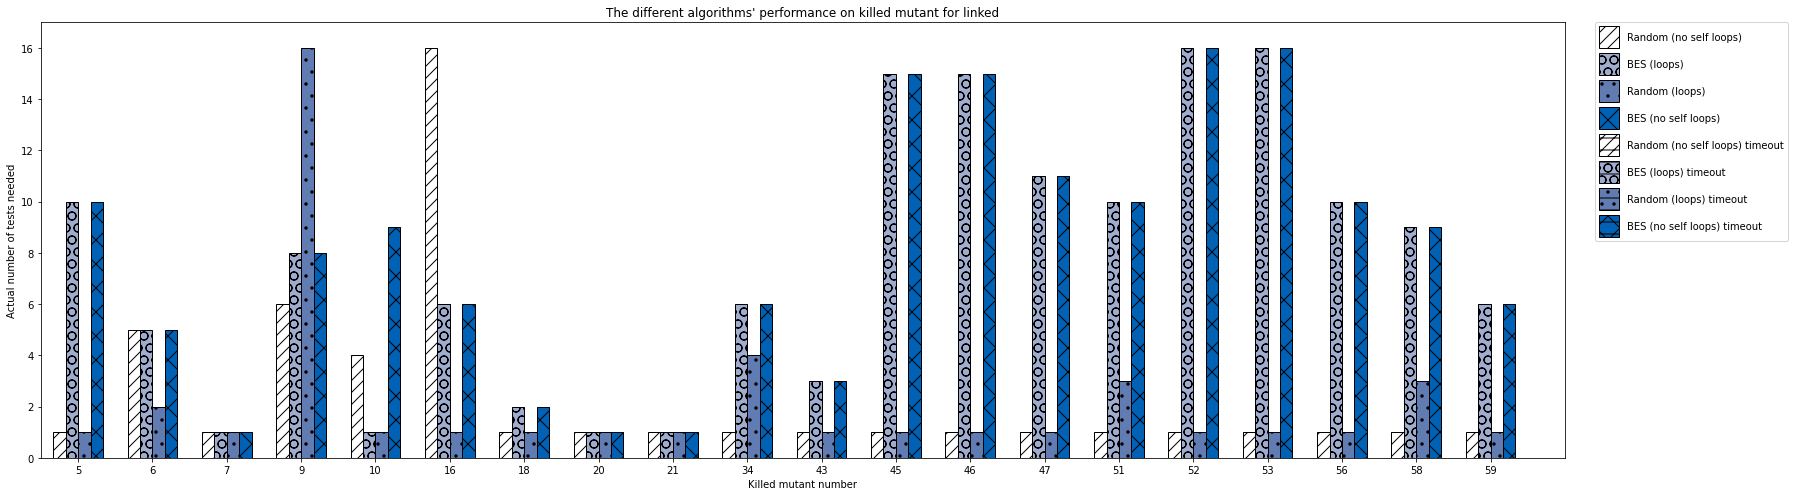

In [5]:

#################################
## Manually:
#################################

# actual_size

desired_mutants = m_lists[0][:22]   #[0:6]
print(f'all_common_mutants: {desired_mutants}')

# y = [ x for x in desired_mutants if x not in ['76', '81'] ]
# desired_mutants = y


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists


# latex.....
over_bound_list = get_over_bound_element(c_lists, desired_mutants, 100)
print(f'over_bound_list: {over_bound_list}')
latex = latex_table_maker(creteria, over_bound_list[0])
print("*****************************")
print(latex)
print("*****************************")
print()

new_desired_mutants = extract_desired_without_over_bound(desired_mutants, over_bound_list[1])
labels = new_desired_mutants
print(f'labels: {labels}')

c_lists = get_cretiera_all_desired_m(dfs, new_desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists




d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria

d_map['x_lim'] = 60
d_map['y_lim'] = 17

plot_4_bars(labels, c_lists, d_map)


labels: ['5', '6', '7', '9', '10', '16', '18', '20', '21', '23', '32', '34', '43', '45', '46', '47', '51', '52', '53', '56', '58', '59']
bes_l data: ([1.0983948707580566, 0.8966608047485352, 0.8060479164123535, 0.6240410804748535, 0.741204023361206, 0.7546441555023193, 0.6269707679748535, 0.7569370269775391, 0.5629968643188477, 1.102351188659668, 1.124500036239624, 0.6217138767242432, 0.6470222473144531, 0.7234370708465576, 0.6806809902191162, 0.6658997535705566, 0.6727278232574463, 0.7333450317382812, 0.7410531044006348, 0.6692838668823242, 0.6921207904815674, 0.6152799129486084], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
rand_l data: ([1.2842707633972168, 1.4880447387695312, 1.3532097339630127, 1.9758310317993164, 1.238635778427124, 1.4988269805908203, 1.4999539852142334, 1.5441808700561523, 1.5449421405792236, 1.7146968841552734, 1.2944512367248535, 1.844299077987671, 1.2479870319366455, 1.3157570362091064, 1.2963831424713137, 1.2382709980010986, 1.46626901

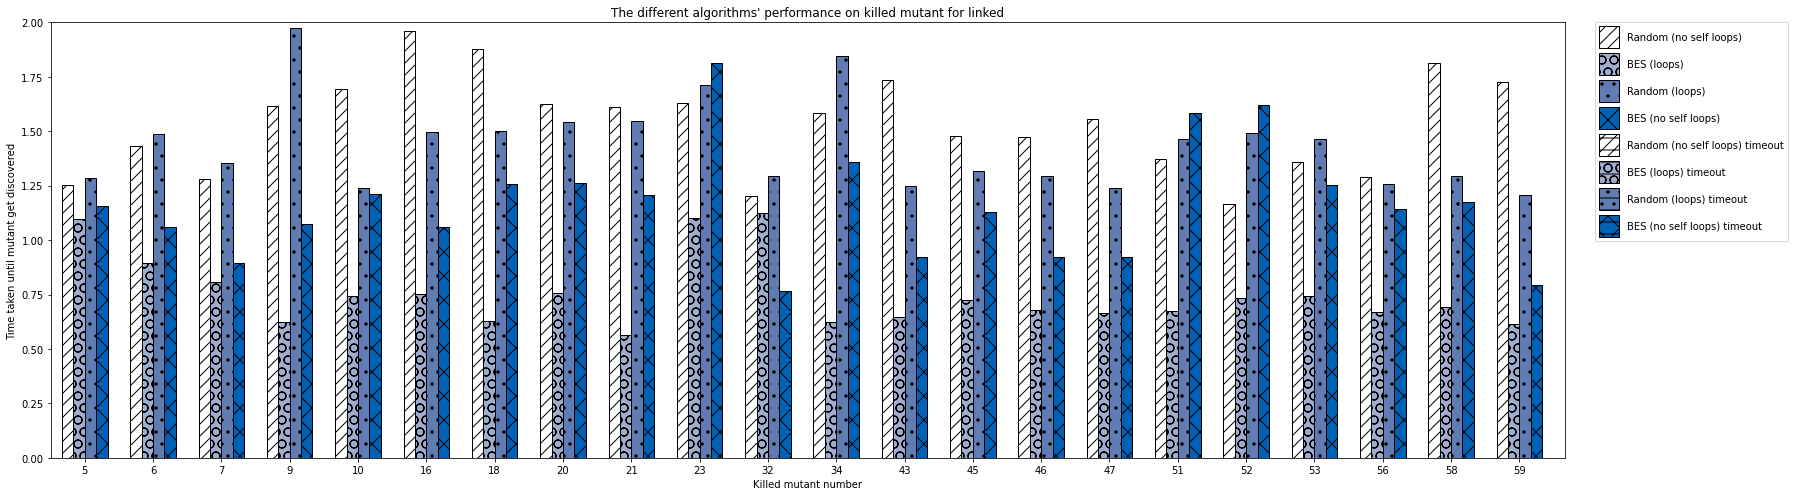

In [6]:
# time_requierd

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0][0:22]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
d_map['x_lim'] = 65
d_map['y_lim'] = 2

plot_4_bars(labels, c_lists, d_map)



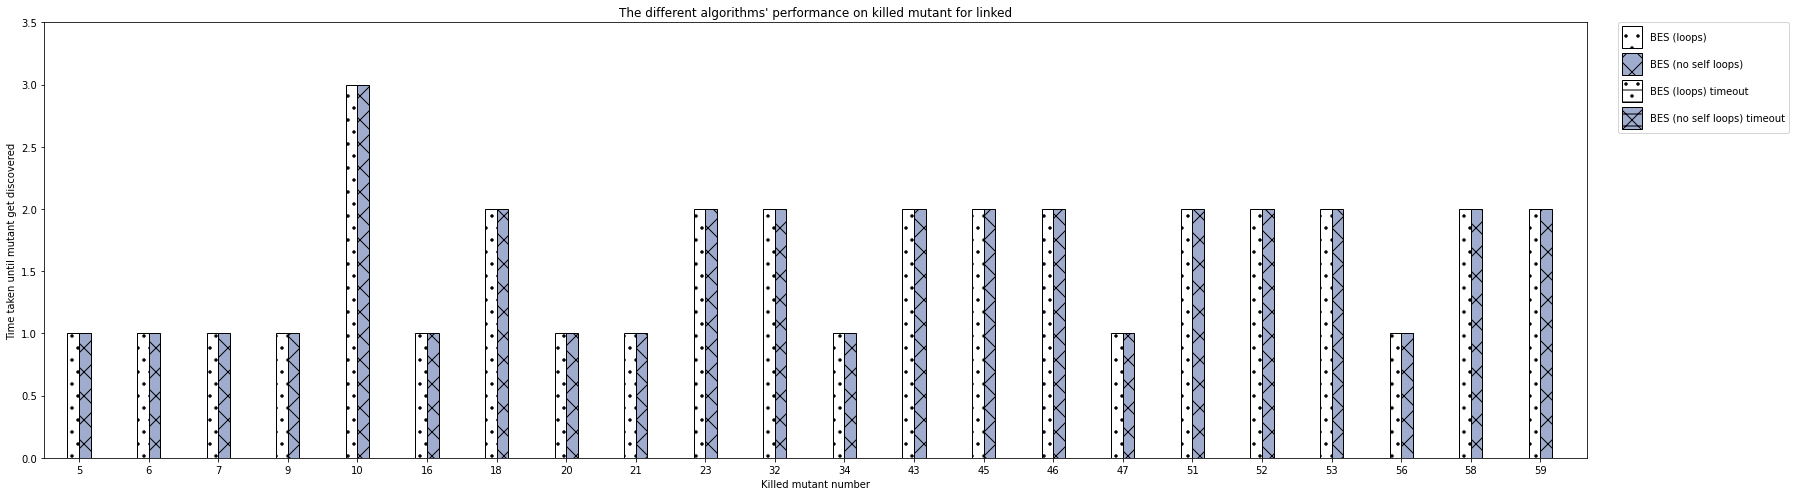

In [7]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, bes_no_lo_c) = c_lists

# print(c_lists)
# print(labels)


d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' = 25
d_map['y_lim'] = 3.5



plot_2_bars(labels, c_lists, d_map)



all_common_mutants: ['60', '62', '64', '65', '67', '68', '70', '72', '73', '76', '77', '81', '82', '83', '86', '87', '89', '90', '93', '96', '98', '100']
labels: ['60', '62', '64', '65', '67', '68', '70', '72', '73', '76', '77', '81', '82', '83', '86', '87', '89', '90', '93', '96', '98', '100']
over_bound_list: ({('76', 36, 1, 35, 3), ('73', 240, 1, 239, 15)}, {'76', '73'})
*****************************
\begin{table}[actual_tests]
\begin{tabular}{|c|c|c|c|c|}
\hline
& BES (Loops) & Random (Loops) & BES (no self loop) & Random (no self loop) \\ \hline
76 & 36    & 1         & 35       & 3          \\ \hline
73 & 240    & 1         & 239       & 15          \\ \hline
\end{tabular}
\end{table}
*****************************

labels: ['60', '62', '64', '65', '67', '68', '70', '72', '77', '81', '82', '83', '86', '87', '89', '90', '93', '96', '98', '100']
bes_l data: ([10, 10, 8, 10, 10, 17, 3, 11, 17, 3, 10, 1, 10, 8, 9, 6, 8, 1, 1, 12], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

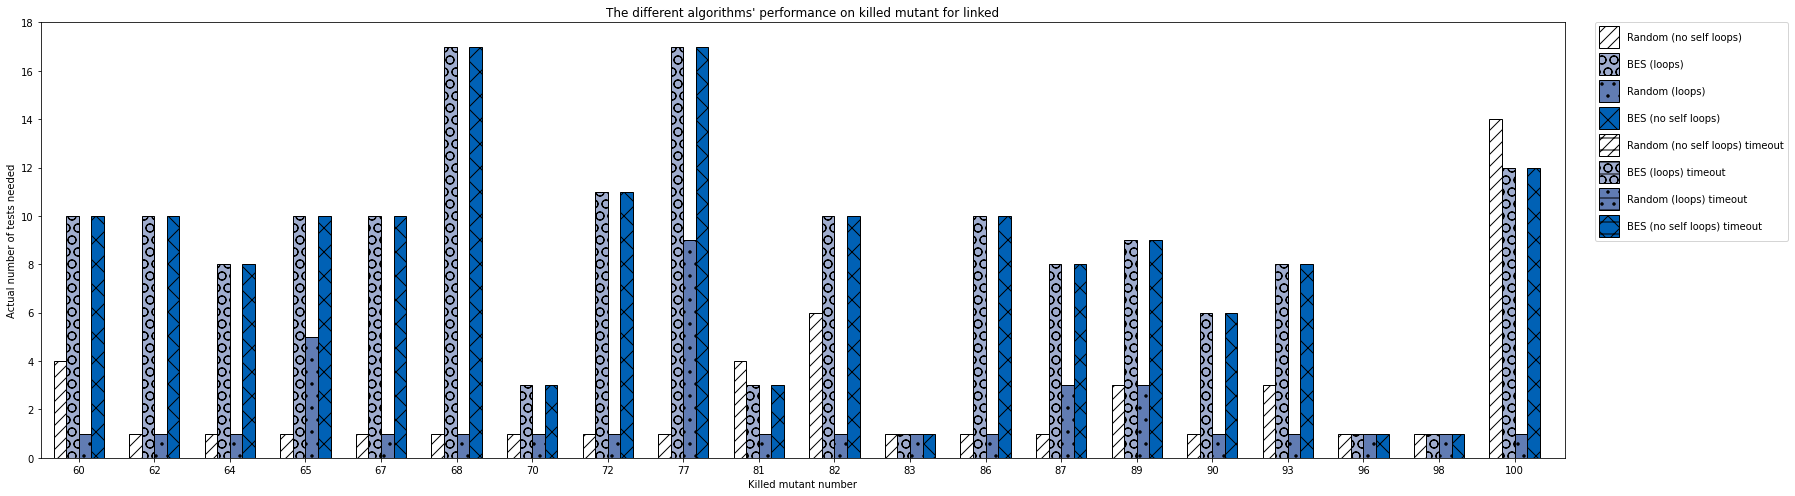

In [8]:

#################################
## Second_half:
#################################
d_map['other'] = 'second_half'

# actual_size

desired_mutants = m_lists[0][22:]    #[0:6]
print(f'all_common_mutants: {desired_mutants}')

# y = [ x for x in desired_mutants if x not in ['76', '81'] ]
# desired_mutants = y


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists


# latex.....
over_bound_list = get_over_bound_element(c_lists, desired_mutants, 30)
print(f'over_bound_list: {over_bound_list}')
latex = latex_table_maker(creteria, over_bound_list[0])
print("*****************************")
print(latex)
print("*****************************")
print()

new_desired_mutants = extract_desired_without_over_bound(desired_mutants, over_bound_list[1])
labels = new_desired_mutants
print(f'labels: {labels}')

c_lists = get_cretiera_all_desired_m(dfs, new_desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists




d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria

d_map['x_lim'] = 59
d_map['y_lim'] = 18

plot_4_bars(labels, c_lists, d_map)


labels: ['60', '62', '64', '65', '67', '68', '70', '72', '73', '76', '77', '81', '82', '83', '86', '87', '89', '90', '93', '96', '98', '100']
bes_l data: ([0.7128891944885254, 0.7742228507995605, 0.6268188953399658, 0.6855790615081787, 0.7740850448608398, 0.6692919731140137, 0.6125462055206299, 0.8188450336456299, 1.3821182250976562, 0.9700472354888916, 0.6905629634857178, 0.602931022644043, 0.6688108444213867, 0.6588270664215088, 0.822411060333252, 0.6258370876312256, 0.6819770336151123, 0.678342342376709, 0.6470351219177246, 1.4822509288787842, 1.7109761238098145, 1.4762930870056152], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
rand_l data: ([1.1898460388183594, 1.3101308345794678, 1.4560050964355469, 1.9131739139556885, 1.314173936843872, 1.3399081230163574, 1.3349990844726562, 1.328622817993164, 1.4175779819488523, 1.5252251625061035, 2.142190933227539, 1.2045259475708008, 1.5246338844299316, 1.1812858581542969, 1.672619104385376, 1.5545852184295654, 1.75444

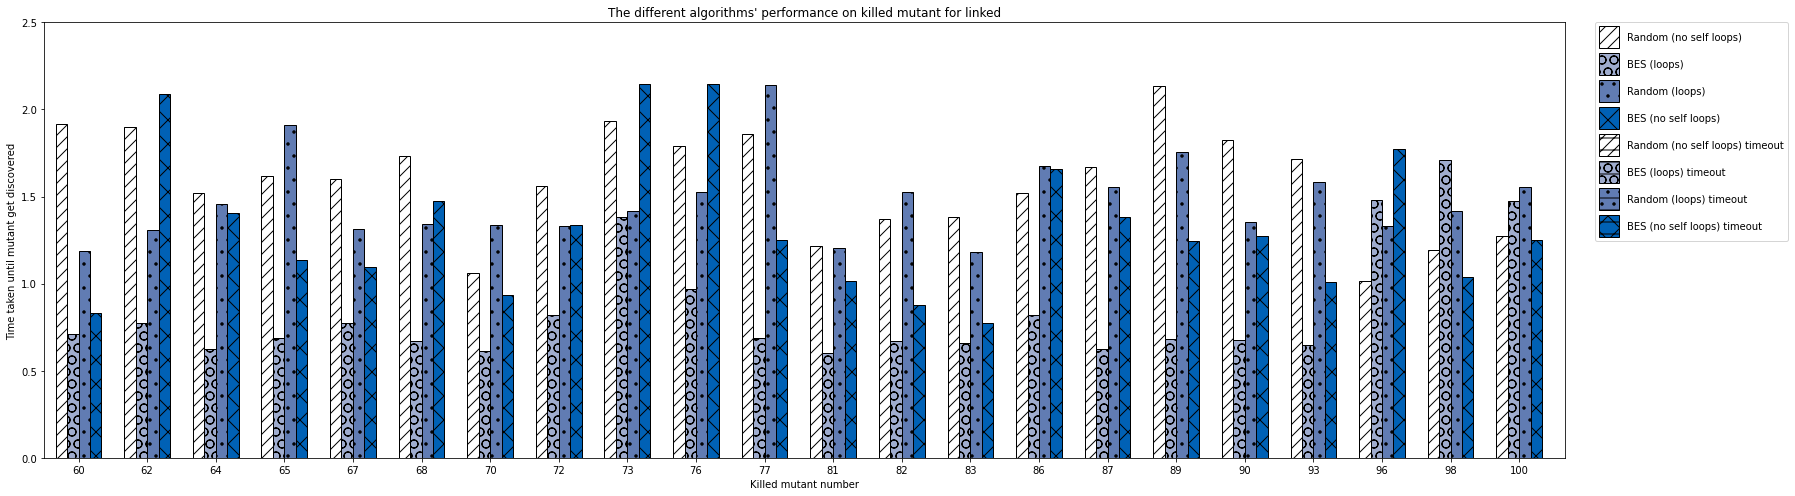

In [9]:
# time_requierd

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0][22:]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
d_map['x_lim'] = 65
d_map['y_lim'] = 2.5

plot_4_bars(labels, c_lists, d_map)



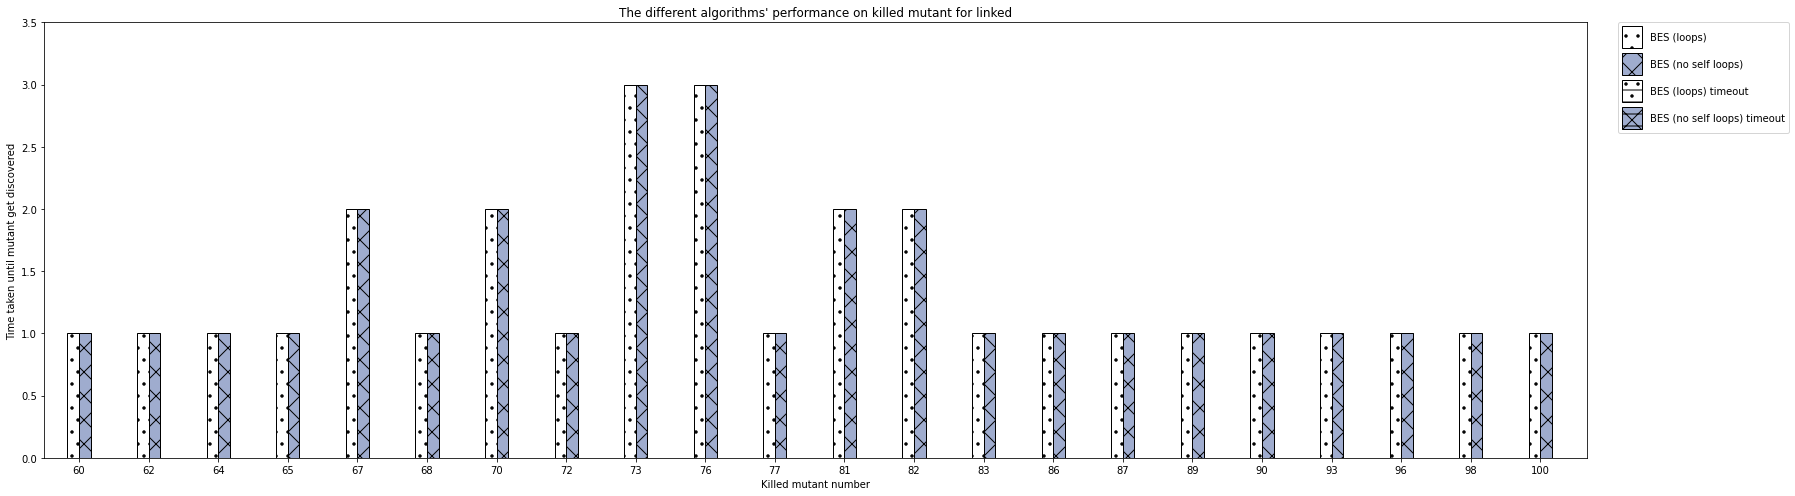

In [10]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0, 120)
(bes_lo_c, bes_no_lo_c) = c_lists

# print(c_lists)
# print(labels)


d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' = 25
d_map['y_lim'] = 3.5



plot_2_bars(labels, c_lists, d_map)

